# Installation of the packages

In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


# Importation of the required modules

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Reading of the dataset from a CSV file

In [4]:
raw_breast_cancer_data_2006_2010 = pd.read_csv('/Users/h.nderitu/PyData/Capstone Project/SEER Breast Cancer Dataset .csv')
print(raw_breast_cancer_data_2006_2010)

      Age                                              Race   \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0     Married (including common law)         NaN       T2      N3      IIIC   
1     Married (including common law)         NaN       T2      N2      II

In [5]:
raw_breast_cancer_data_2006_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [6]:
# rename the columns to terms that are more meaningful
raw_breast_cancer_data_2006_2010.rename(columns = {'Race ':'Race',
                                                   'T Stage ':'T_stage',
                                                   'N Stage':'N_stage',
                                                   '6th Stage':'6th_stage',
                                                   'A Stage':'A_stage', 
                                                   'Reginol Node Positive': 'Regional Node Positive'}, 
                                                   inplace = True)

In [7]:
# Check names of columns
raw_breast_cancer_data_2006_2010.columns

Index(['Age', 'Race', 'Marital Status', 'Unnamed: 3', 'T_stage', 'N_stage',
       '6th_stage', 'Grade', 'A_stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [8]:
# Remove column index 3 called Unnamed: 3 from the data as it has missing values for all rows.
breast_cancer_data_2006_2010 = raw_breast_cancer_data_2006_2010.drop(columns=['Unnamed: 3'], axis = 1)
print(breast_cancer_data_2006_2010)

      Age                                               Race  \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T_stage N_stage 6th_stage  \
0     Married (including common law)      T2      N3      IIIC   
1     Married (including common law)      T2      N2      IIIA   
2     Married (including common l

In [9]:
breast_cancer_data_2006_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T_stage                 4024 non-null   object
 4   N_stage                 4024 non-null   object
 5   6th_stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Regional Node Positive  4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [10]:
# Check top 5 rows of data
breast_cancer_data_2006_2010.head()

,Age,Race,Marital Status,T_stage,N_stage,6th_stage,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [11]:
# Check bottom 5 rows of data
breast_cancer_data_2006_2010.tail()

,Age,Race,Marital Status,T_stage,N_stage,6th_stage,Grade,A_stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
4019,52,White,Married (including common law),T1,N1,IIA,Well differentiated; Grade I,Regional,10,Positive,Positive,19,1,107,Alive
4020,53,White,Married (including common law),T1,N2,IIIA,Poorly differentiated; Grade III,Regional,9,Negative,Negative,13,5,107,Alive
4021,53,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Negative,Negative,4,2,107,Alive
4022,60,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T1,N1,IIA,Moderately differentiated; Grade II,Regional,9,Positive,Positive,14,2,107,Alive
4023,62,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,8,Positive,Positive,1,1,107,Alive


**The data is for patients diagnosed with breast cancer between the years 2006 until 2010. The patients were followed up until November 2017 when the data was updated and extracted. A follow up of a minimum of 7 years and 11 months and a maximum of 11 years and 11 months.** 

In [12]:
# Create a data frame with the columns with numerical variables
breast_cancer_numerical_data = breast_cancer_data_2006_2010[['Age','Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']]
print(breast_cancer_numerical_data)

      Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
0      43          40                      19                      11   
1      47          45                      25                       9   
2      67          25                       4                       1   
3      46          19                      26                       1   
4      63          35                      21                       5   
...   ...         ...                     ...                     ...   
4019   52          10                      19                       1   
4020   53           9                      13                       5   
4021   53           9                       4                       2   
4022   60           9                      14                       2   
4023   62           8                       1                       1   

      Survival Months  
0                   1  
1                   2  
2                   2  
3                   2  
4  

# **A. Analysis of the categorical disease variables and survival in Months**

## 1. Analysis of cancer stage and survival in months
   
- T Stage                
- N_stage                 
- 6th_stage 

In [15]:
# Analysis of the relationship between the T stage at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('T_stage')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
T_stage,,,,,,,,
T1,1603.0,73.563943,21.731195,2.0,58.5,75.0,92.0,107.0
T2,1786.0,70.301232,23.319675,1.0,56.0,72.0,89.0,107.0
T3,533.0,68.885553,23.562109,4.0,54.0,69.0,88.0,107.0
T4,102.0,65.745098,27.216654,9.0,43.5,73.0,89.0,107.0


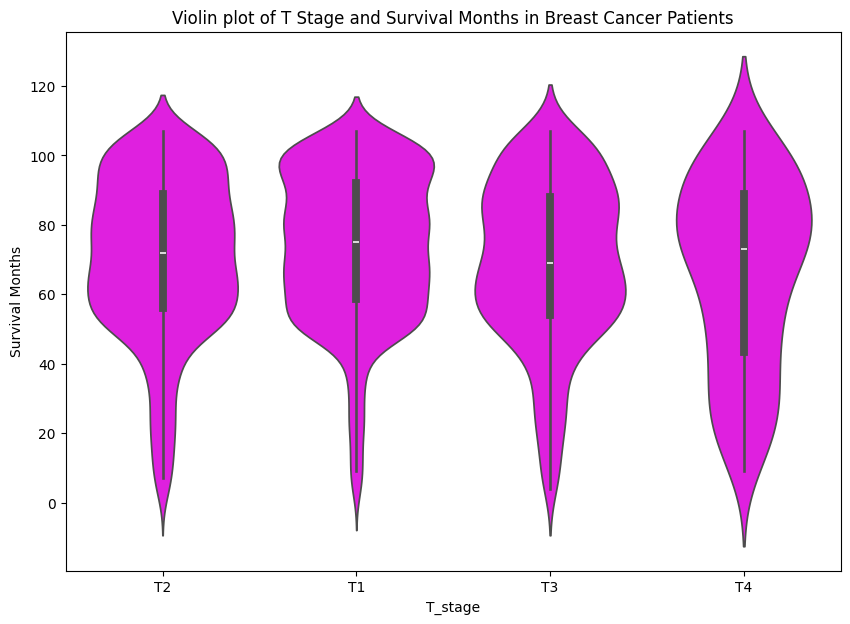

In [16]:
# Visualization of relationship between T_stage at diagnosis and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='T_stage',
    y='Survival Months',
    color='Magenta')
plt.title('Violin plot of T Stage and Survival Months in Breast Cancer Patients')
plt.show()

In [17]:
# Analysis of the relationship between the N_STAGE at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('N_stage')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
N_stage,,,,,,,,
N1,2732.0,73.169107,21.608360,2.0,58.00,75.0,91.0,107.0
N2,820.0,69.714634,23.601940,2.0,55.00,70.0,89.0,107.0
N3,472.0,63.218220,26.860911,1.0,45.75,66.0,84.0,107.0


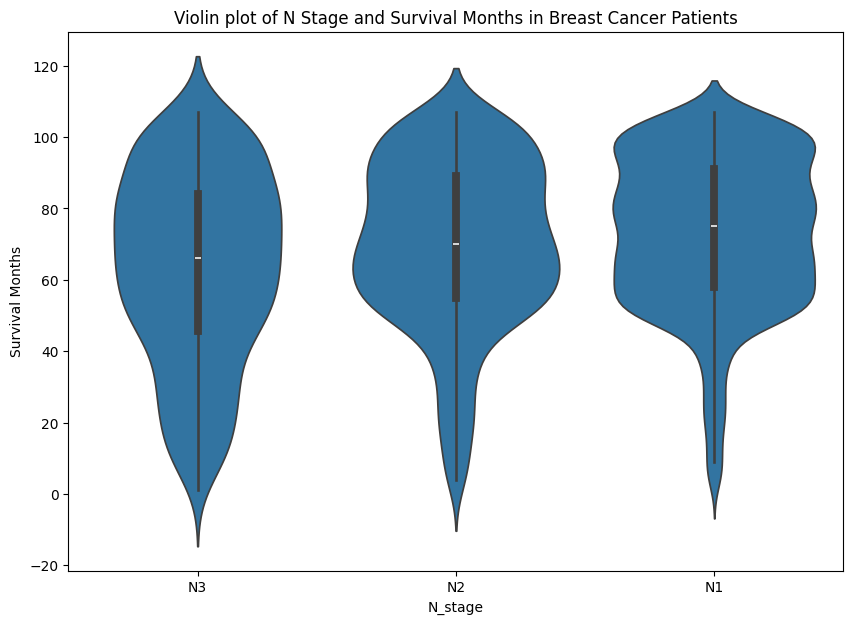

In [18]:
# Visualization of comparison of N_stage and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='N_stage', 
    y='Survival Months')
plt.title('Violin plot of N Stage and Survival Months in Breast Cancer Patients')
plt.show()

In [19]:
# Analysis of the relationship between the 6TH stage (0VERALL CANCER STAGE) at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('6th_stage')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
6th_stage,,,,,,,,
IIA,1305.0,74.408429,21.286234,2.0,60.00,76.0,93.0,107.0
IIB,1130.0,72.223009,21.972843,2.0,57.00,74.0,89.0,107.0
IIIA,1050.0,70.188571,22.940273,2.0,56.00,70.5,89.0,107.0
IIIB,67.0,69.417910,24.590063,16.0,51.50,74.0,89.0,107.0
IIIC,472.0,63.218220,26.860911,1.0,45.75,66.0,84.0,107.0


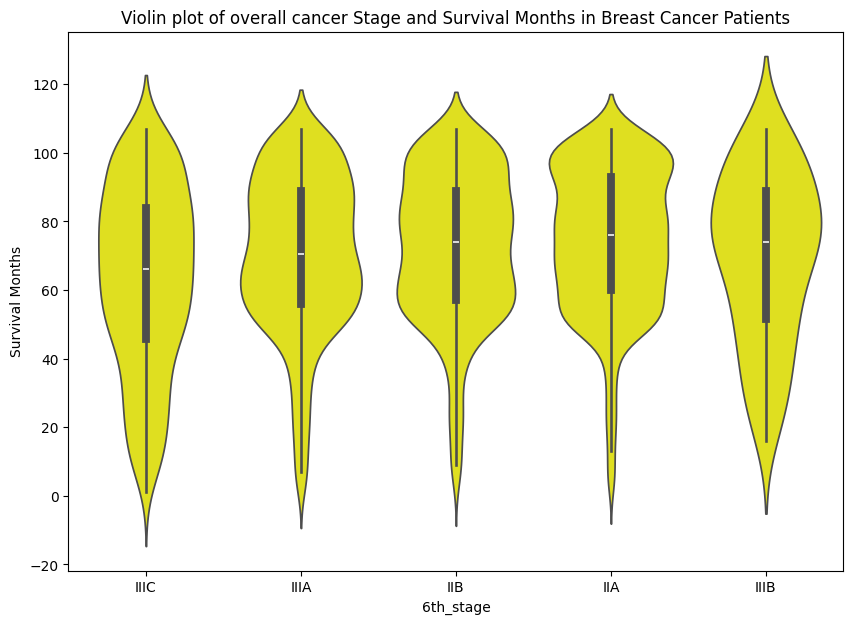

In [20]:
# Visualization of comparison of overall cancer_stage and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='6th_stage', 
    y='Survival Months',
    color= 'Yellow')
plt.title('Violin plot of overall cancer Stage and Survival Months in Breast Cancer Patients')
plt.show()

## 2. Analyis of Tumour characteristics and survival in months
         
- Grade                  
- A_stage 

In [21]:
# Analysis of the relationship between the Grade at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('Grade')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Grade,,,,,,,,
Moderately differentiated; Grade II,2351.0,72.179073,22.191350,1.0,57.0,73.0,90.0,107.0
Poorly differentiated; Grade III,1111.0,68.749775,24.887394,2.0,53.0,70.0,89.0,107.0
Undifferentiated; anaplastic; Grade IV,19.0,64.421053,32.658699,9.0,33.5,75.0,91.0,102.0
Well differentiated; Grade I,543.0,72.937385,20.966934,5.0,58.0,74.0,89.0,107.0


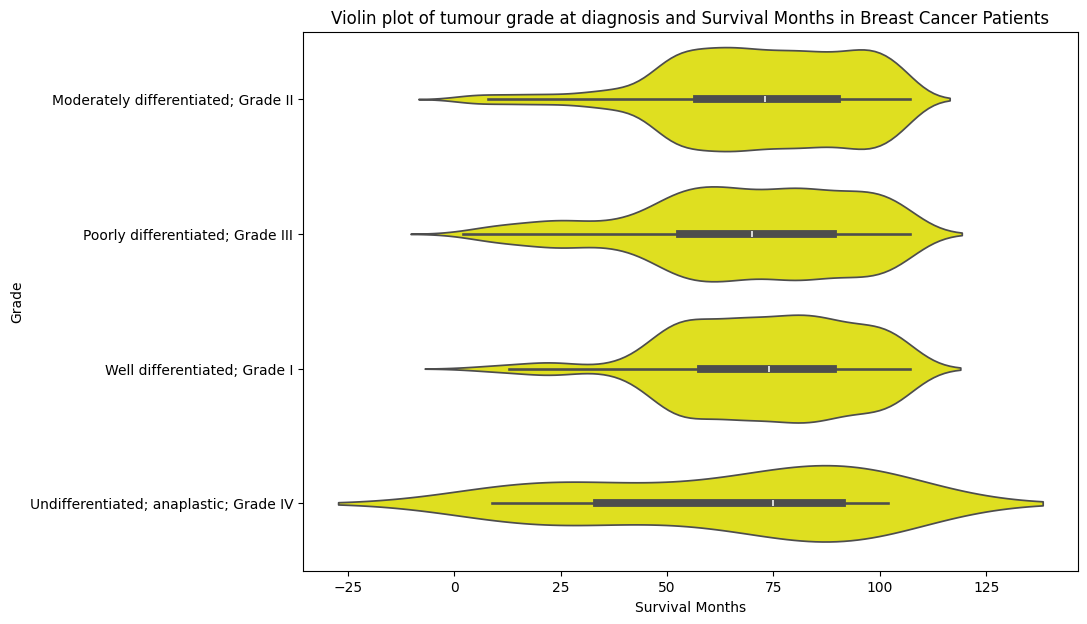

In [22]:
# Visualization of comparison of tumour grade and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    y ='Grade', 
    x='Survival Months',
    color= 'Yellow')
plt.title('Violin plot of tumour grade at diagnosis and Survival Months in Breast Cancer Patients')
plt.xlabel('Survival Months')
plt.show()

In [23]:
# Analysis of the relationship between the anatomical stage at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('A_stage')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
A_stage,,,,,,,,
Distant,92.0,60.793478,28.733538,8.0,40.0,60.5,86.25,107.0
Regional,3932.0,71.543744,22.714152,1.0,56.0,73.0,90.00,107.0


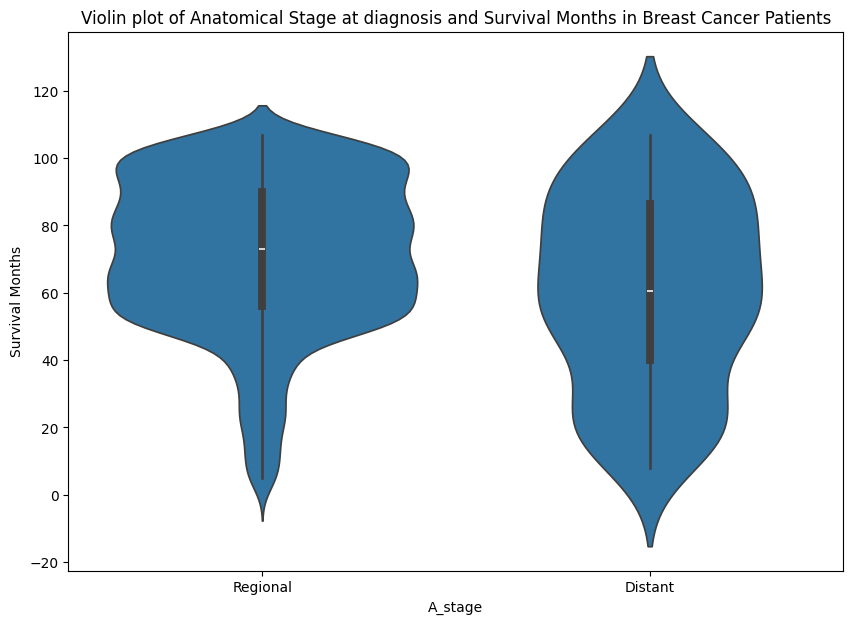

In [24]:
# Visualization of comparison of tumour grade and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='A_stage', 
    y='Survival Months')
plt.title('Violin plot of Anatomical Stage at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

## 3. Analysis of hormonal status of the breast tumour and survival in months

In [25]:
breast_cancer_data_2006_2010.groupby('Estrogen Status')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Estrogen Status,,,,,,,,
Negative,269.0,60.297398,30.502398,5.0,30.0,64.0,87.0,107.0
Positive,3755.0,72.086019,22.075458,1.0,57.0,73.0,90.0,107.0


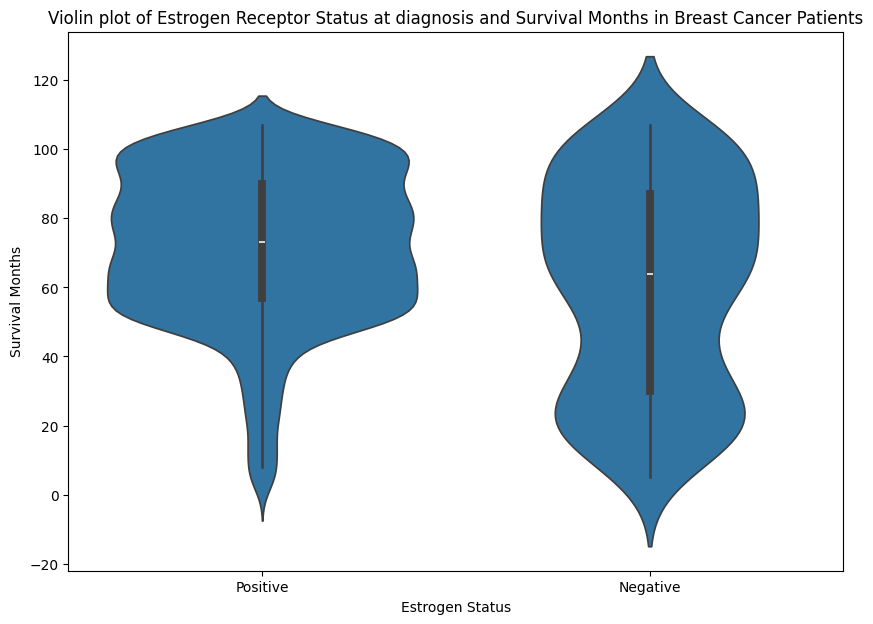

In [26]:
# Visualization of comparison of estrogen status and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Estrogen Status', 
    y='Survival Months')
plt.title('Violin plot of Estrogen Receptor Status at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

In [27]:
breast_cancer_data_2006_2010.groupby('Progesterone Status')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Progesterone Status,,,,,,,,
Negative,698.0,66.494269,27.560927,4.0,49.0,69.0,90.0,107.0
Positive,3326.0,72.306073,21.693147,1.0,57.0,74.0,90.0,107.0


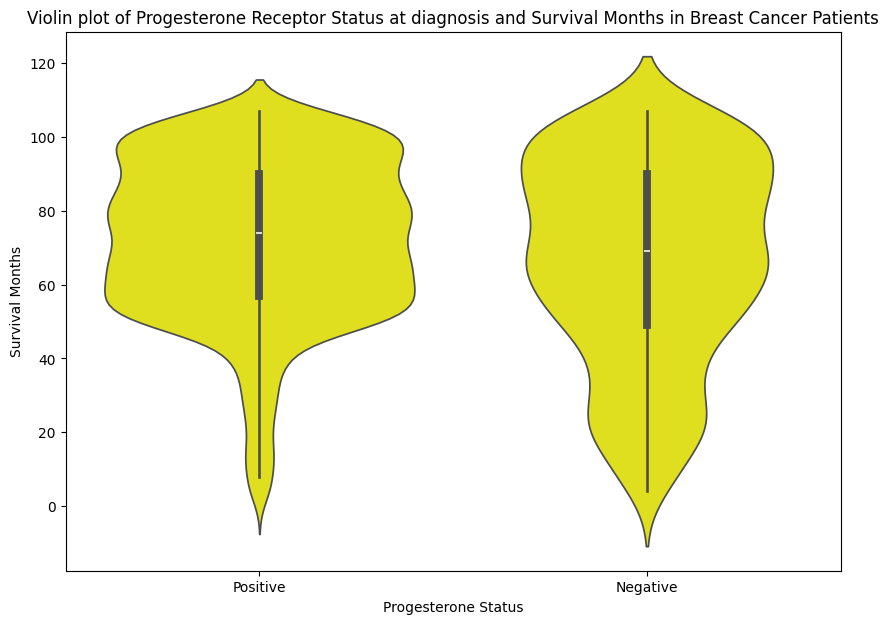

In [28]:
# Visualization of comparison of progesterone status and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Progesterone Status', 
    y='Survival Months',
    color = 'yellow')
plt.title('Violin plot of Progesterone Receptor Status at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

# **B. Analysis of the categorical disease variables and status on follow up**

## 1. Analysis of the cancer stages and status on follow up

T_stage    T1    T2   T3  T4
Status                      
Alive    1446  1483  417  62
Dead      157   303  116  40


Text(0, 0.5, 'Count of Patients')

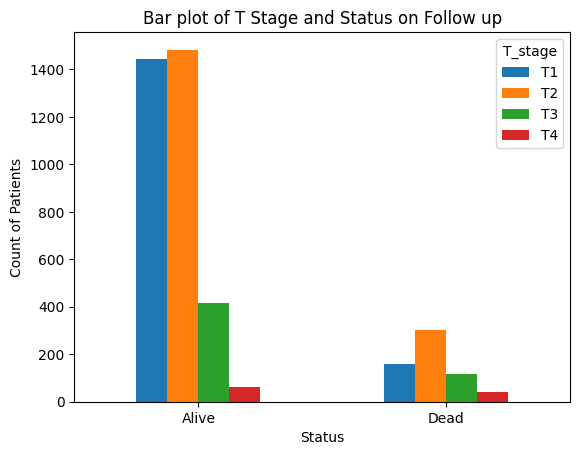

In [29]:
# Compare the T_ Stage at diagnosis and Status of the patient on follow up
T_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['T_stage'])
print(T_stage_status_ctab)
barplot = T_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of T Stage and Status on Follow up')
plt.xlabel('Status')
plt.ylabel('Count of Patients')

In [30]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010.Status,breast_cancer_data_2006_2010.T_stage, normalize='index')

T_stage,T1,T2,T3,T4
Status,,,,
Alive,0.424296,0.435153,0.122359,0.018192
Dead,0.254870,0.491883,0.188312,0.064935


N_stage    N1   N2   N3
Status                 
Alive    2462  655  291
Dead      270  165  181


Text(0, 0.5, 'Count of Patients')

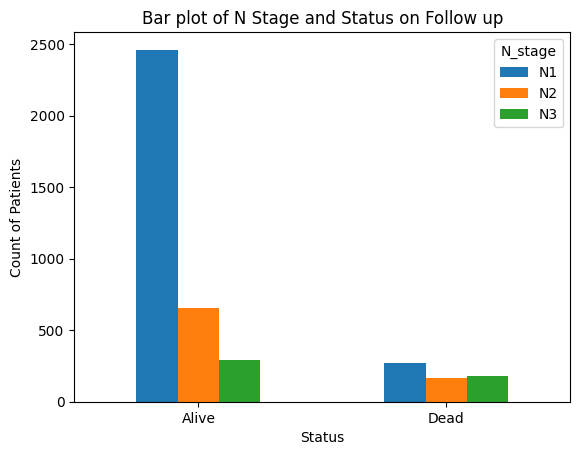

In [31]:
# Compare the N_ Stage at diagnosis and Status of the patient on follow up
N_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['N_stage'])
print(N_stage_status_ctab)
barplot = N_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of N Stage and Status on Follow up')
plt.xlabel('Status')
plt.ylabel('Count of Patients')

In [32]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010.Status,breast_cancer_data_2006_2010.N_stage, normalize='index')

N_stage,N1,N2,N3
Status,,,
Alive,0.722418,0.192195,0.085387
Dead,0.438312,0.267857,0.293831


6th_stage   IIA  IIB  IIIA  IIIB  IIIC
Status                                
Alive      1209  995   866    47   291
Dead         96  135   184    20   181


Text(0.5, 0, 'Status')

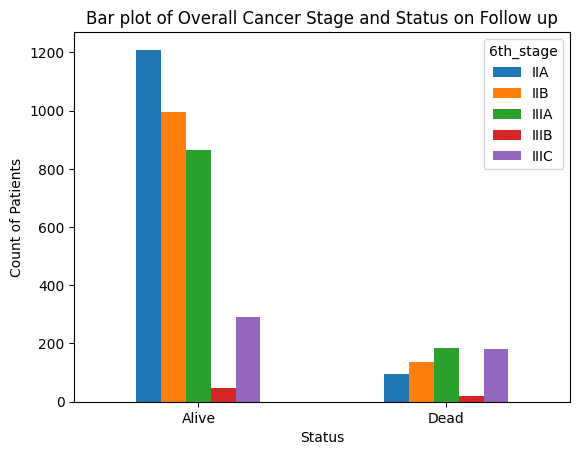

In [33]:
# Compare the N_ Stage at diagnosis and Status of the patient on follow up
sixth_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['6th_stage'])
print(sixth_stage_status_ctab)
barplot = sixth_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of Overall Cancer Stage and Status on Follow up')
plt.ylabel('Count of Patients')
plt.xlabel('Status')

In [34]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['6th_stage'], normalize= 'index')

6th_stage,IIA,IIB,IIIA,IIIB,IIIC
Status,,,,,
Alive,0.354754,0.291960,0.254108,0.013791,0.085387
Dead,0.155844,0.219156,0.298701,0.032468,0.293831


## 2. Analysis of Tumor Characteristics and Status of the patient on follow up

Grade   Moderately differentiated; Grade II  Poorly differentiated; Grade III  \
Status                                                                          
Alive                                  2046                               848   
Dead                                    305                               263   

Grade   Undifferentiated; anaplastic; Grade IV  Well differentiated; Grade I  
Status                                                                        
Alive                                       10                           504  
Dead                                         9                            39  


Text(0.5, 0, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

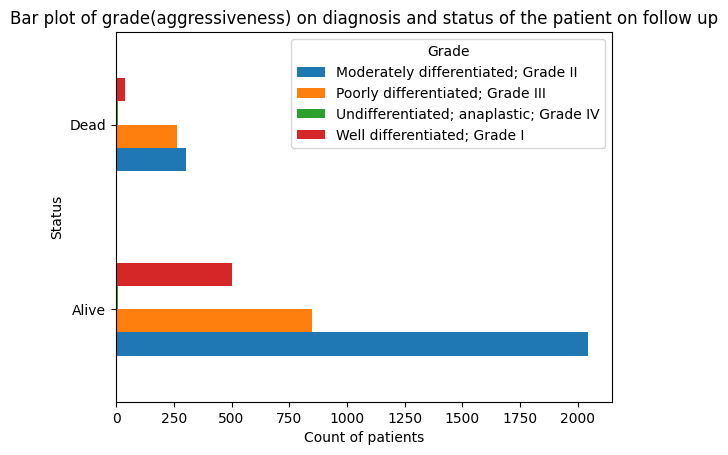

In [35]:
grade_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Grade'])
print(grade_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = grade_versus_status.plot.barh(rot=0)
plt.title('Bar plot of grade(aggressiveness) on diagnosis and status of the patient on follow up')
plt.ylabel('Status')
plt.xlabel('Count of patients')

In [36]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Grade'], normalize= 'index')

Grade,Moderately differentiated; Grade II,Poorly differentiated; Grade III,Undifferentiated; anaplastic; Grade IV,Well differentiated; Grade I
Status,,,,
Alive,0.600352,0.248826,0.002934,0.147887
Dead,0.495130,0.426948,0.014610,0.063312


A_stage  Distant  Regional
Status                    
Alive         57      3351
Dead          35       581


Text(0.5, 0, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

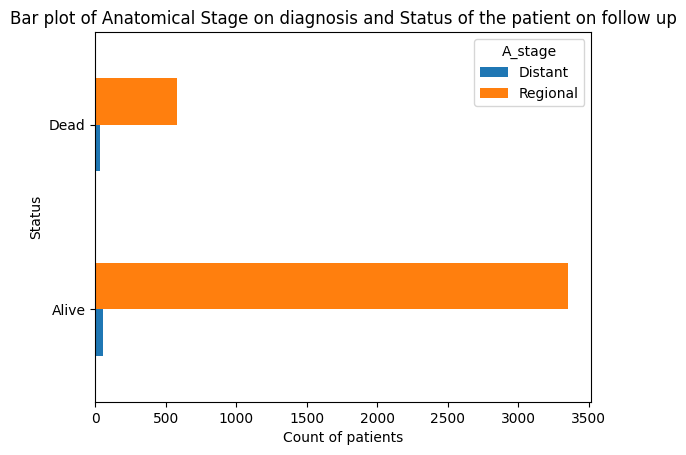

In [37]:
A_stage_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['A_stage'])
print(A_stage_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = A_stage_versus_status.plot.barh(rot=0)
plt.title('Bar plot of Anatomical Stage on diagnosis and Status of the patient on follow up')
plt.ylabel('Status')
plt.xlabel('Count of patients')

In [38]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['A_stage'], normalize= 'index')

A_stage,Distant,Regional
Status,,
Alive,0.016725,0.983275
Dead,0.056818,0.943182


## 3. Analysis of Hormonal Status and Status of the patient on follow up

Estrogen Status  Negative  Positive
Status                             
Alive                 161      3247
Dead                  108       508


Text(0, 0.5, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

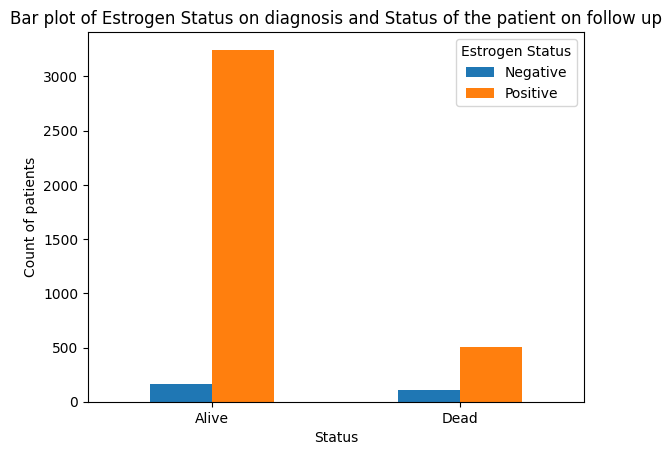

In [39]:
estrogen_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Estrogen Status'])
print(estrogen_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = estrogen_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Estrogen Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Status')
plt.ylabel('Count of patients')

In [40]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Estrogen Status'], normalize= 'index')

Estrogen Status,Negative,Positive
Status,,
Alive,0.047242,0.952758
Dead,0.175325,0.824675


Progesterone Status  Negative  Positive
Status                                 
Alive                     494      2914
Dead                      204       412


Text(0, 0.5, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

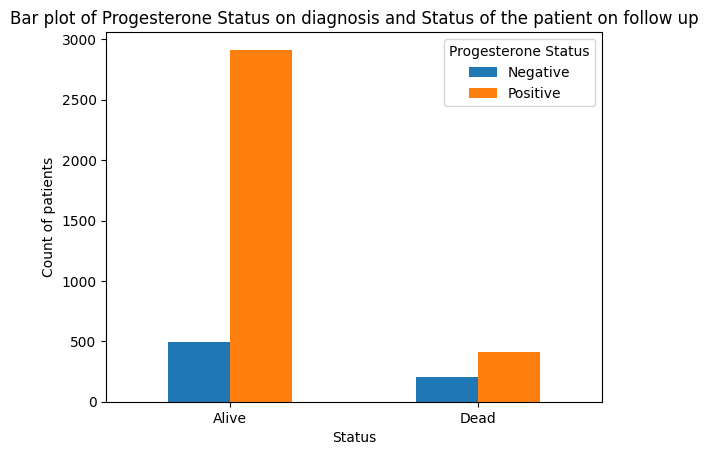

In [41]:
progesterone_versus_status = pd.crosstab( breast_cancer_data_2006_2010['Status'], breast_cancer_data_2006_2010['Progesterone Status'])
print(progesterone_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = progesterone_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Progesterone Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Status')
plt.ylabel('Count of patients')

In [42]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Progesterone Status'], normalize= 'index')

Progesterone Status,Negative,Positive
Status,,
Alive,0.144953,0.855047
Dead,0.331169,0.668831


# **C. Analysis of survival in months and the numerical variables**

Numerical variables: tumour size, number of regional nodes examined, number of positive regional nodes and survival months**

Will involve comparison of numerical variables

## 1. Analysis of survival in months and Tumor Size,Regional Node Examined,Regional Node Positive, Survival Months

In [44]:
# creation of a dataframe with numerical data from the columns:'Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months'
breast_cancer_numerical_data_2 = breast_cancer_data_2006_2010[['Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']]
print(breast_cancer_numerical_data_2)

      Tumor Size  Regional Node Examined  Regional Node Positive  \
0             40                      19                      11   
1             45                      25                       9   
2             25                       4                       1   
3             19                      26                       1   
4             35                      21                       5   
...          ...                     ...                     ...   
4019          10                      19                       1   
4020           9                      13                       5   
4021           9                       4                       2   
4022           9                      14                       2   
4023           8                       1                       1   

      Survival Months  
0                   1  
1                   2  
2                   2  
3                   2  
4                   3  
...               ...  
4019           

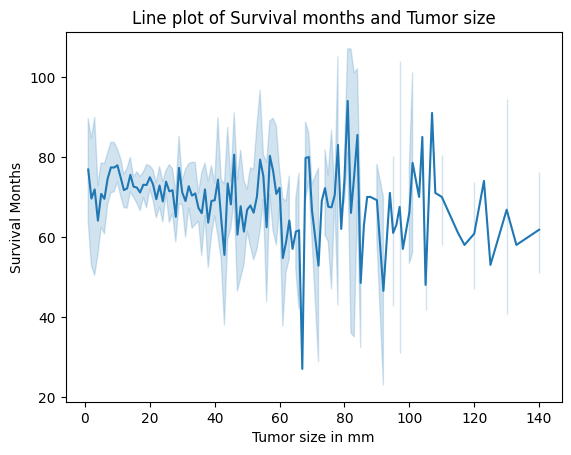

In [45]:
# visualize the data
sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Tumor Size')
plt.title('Line plot of Survival months and Tumor size')
plt.xlabel('Tumor size in mm')
plt.show()

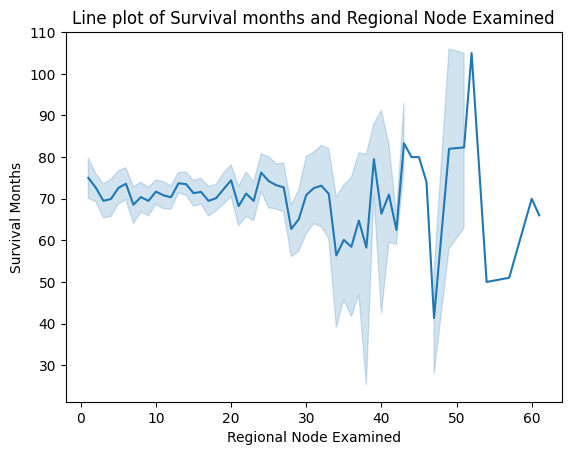

In [46]:
# visualize the data
sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Regional Node Examined')
plt.title('Line plot of Survival months and Regional Node Examined')
plt.show()

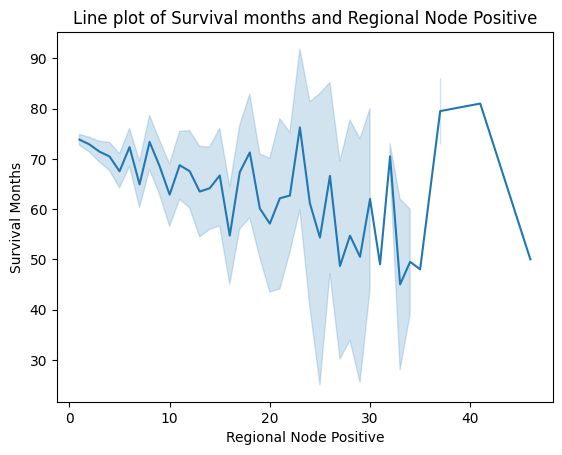

In [47]:
# visualize the data
sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Regional Node Positive')
plt.title('Line plot of Survival months and Regional Node Positive')
plt.show()

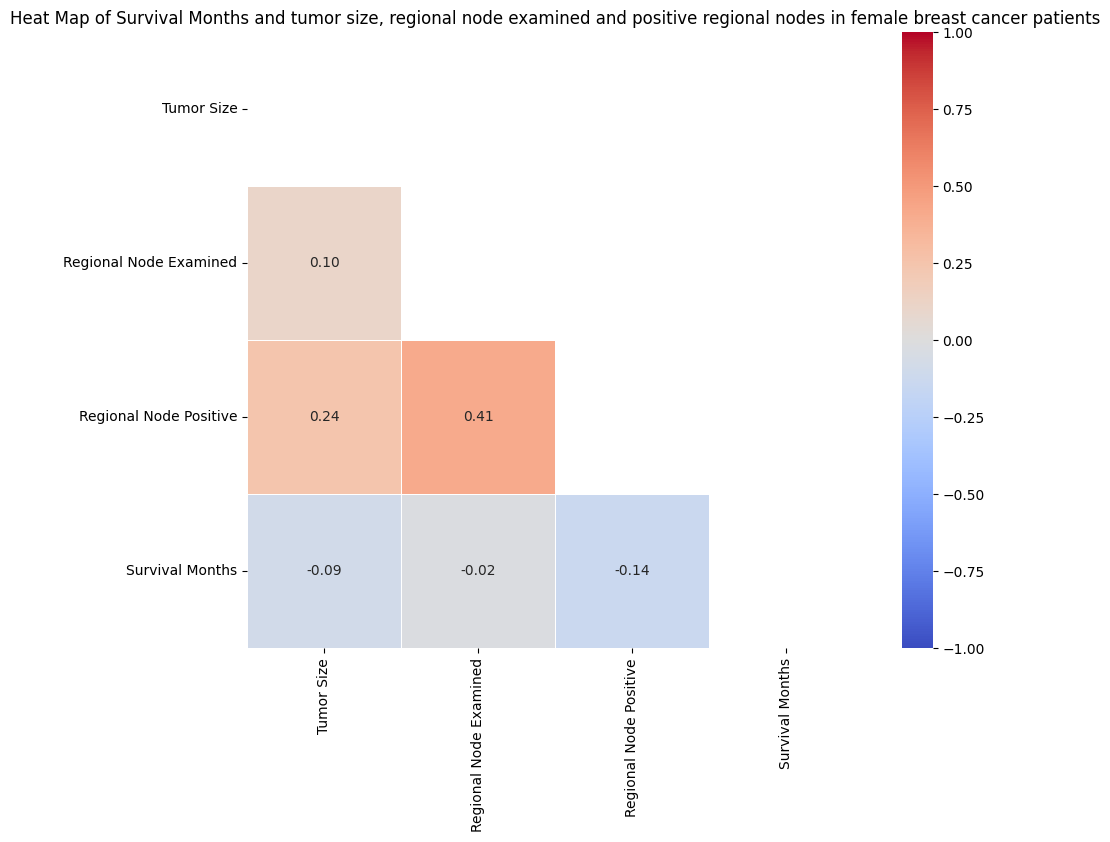

In [48]:
# Calculate the correlation matrix
correlation_matrix = breast_cancer_numerical_data_2.corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize = (10,8))
# The color map 'coolwarm' is used to differentiate high, low, and medium correlations.
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title('Heat Map of Survival Months and tumor size, regional node examined and positive regional nodes in female breast cancer patients')
plt.show()

# D. **Analysis of  the numerical variables and status on follow up**

## 1. Status versus Tumor Size

In [49]:
breast_cancer_data_2006_2010.groupby('Status')['Tumor Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,29.268779,20.303175,1.0,15.0,23.0,35.0,140.0
Dead,616.0,37.139610,24.116115,1.0,20.0,30.0,50.0,140.0


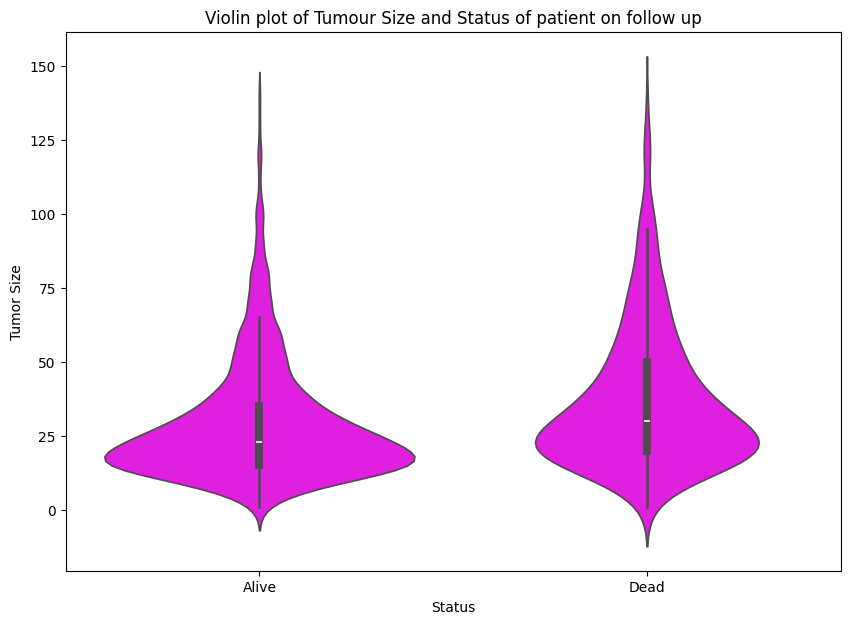

In [50]:
# Visualization of comparison of race and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Tumor Size',
    color= 'Magenta')
plt.title('Violin plot of Tumour Size and Status of patient on follow up')
plt.show()

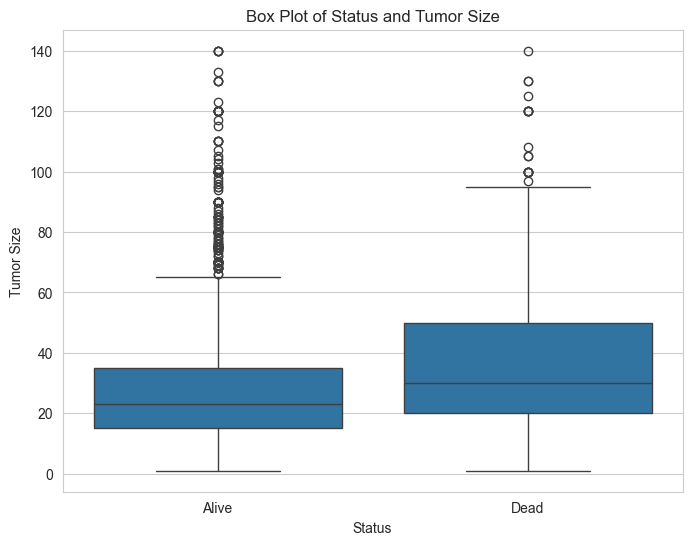

In [51]:
# visualisation of a boxplot using seaborn for comparison of tumor size and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Tumor Size',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Tumor Size')
ax.set_title('Box Plot of Status and Tumor Size')
plt.show()

## 2. Status versus Regional Node Examined

In [52]:
breast_cancer_data_2006_2010.groupby('Status')['Regional Node Examined'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,14.237383,8.023208,1.0,9.0,14.0,19.0,61.0
Dead,616.0,15.019481,8.486600,1.0,9.0,14.0,20.0,57.0


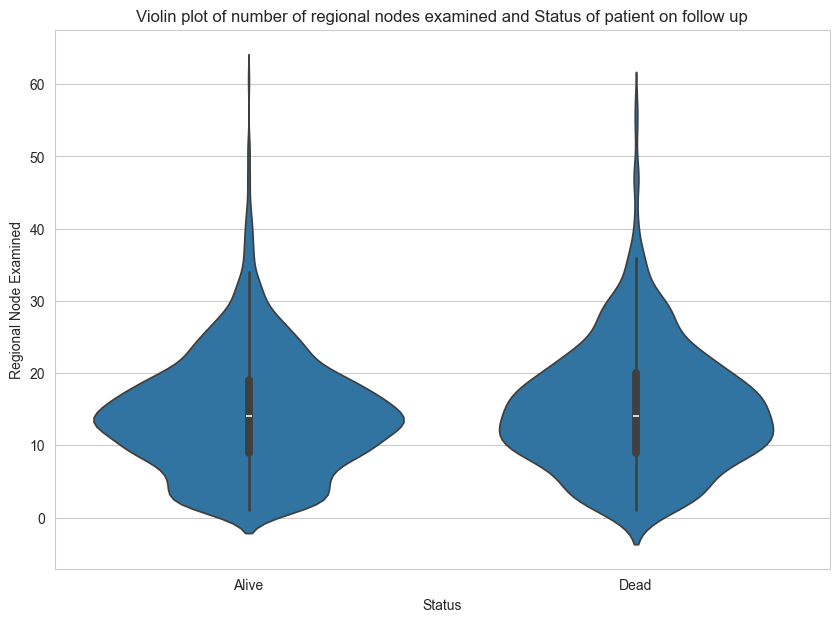

In [53]:
# Visualization of comparison of number of regional nodes examined and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Regional Node Examined')
plt.title('Violin plot of number of regional nodes examined and Status of patient on follow up')
plt.show()

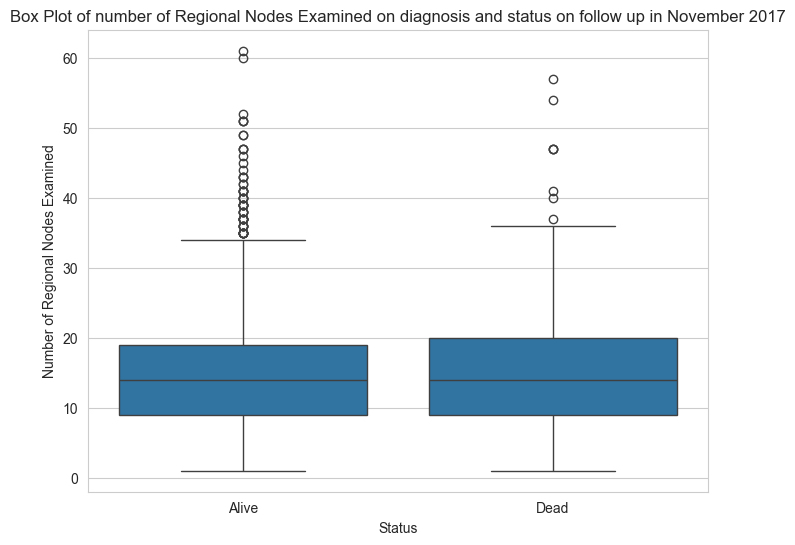

In [54]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Regional Node Examined',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Number of Regional Nodes Examined')
ax.set_title('Box Plot of number of Regional Nodes Examined on diagnosis and status on follow up in November 2017')
plt.show()

## 3. Status on follow up versus number of positive regional nodes on diagnosis

In [55]:
breast_cancer_data_2006_2010.groupby('Status')['Regional Node Positive'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,3.600646,4.375180,1.0,1.0,2.0,4.0,41.0
Dead,616.0,7.241883,7.312642,1.0,2.0,4.0,10.0,46.0


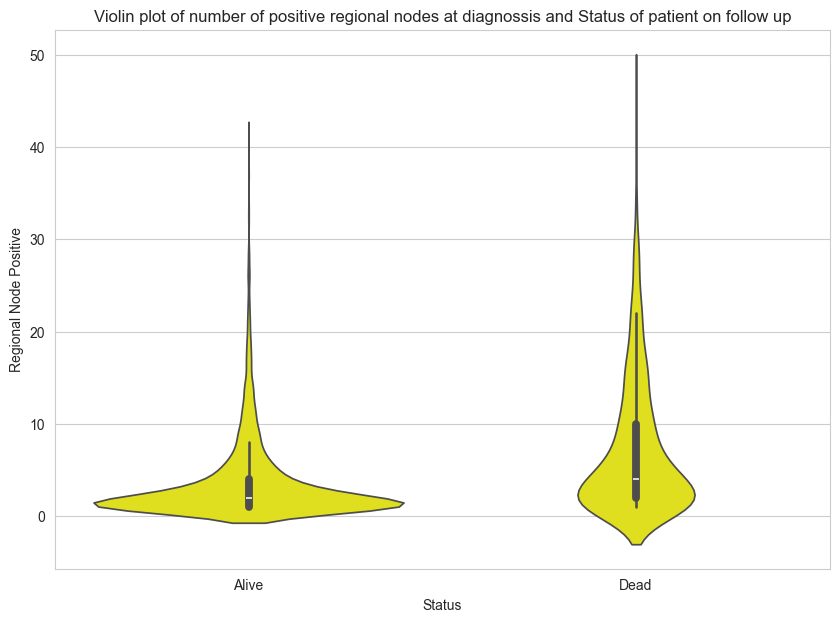

In [56]:
# Visualization of comparison of race and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Regional Node Positive',
    color = 'Yellow')
plt.title('Violin plot of number of positive regional nodes at diagnossis and Status of patient on follow up')
plt.show()

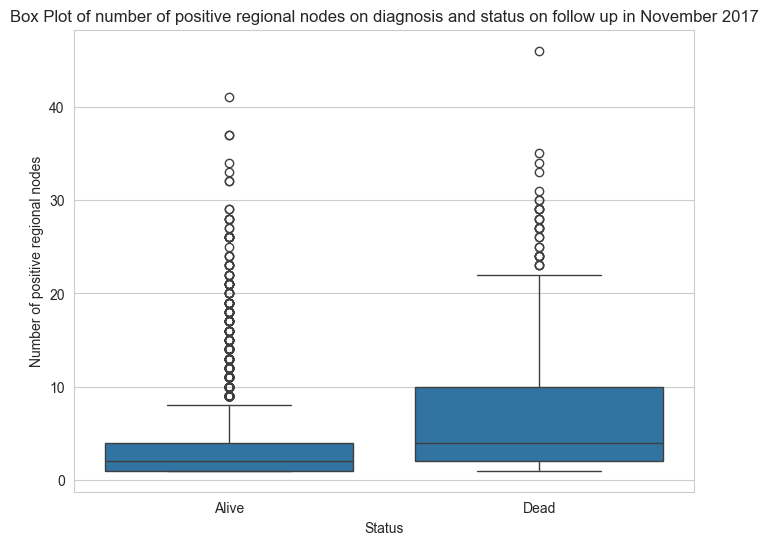

In [57]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Regional Node Positive',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Number of positive regional nodes')
ax.set_title('Box Plot of number of positive regional nodes on diagnosis and status on follow up in November 2017')
plt.show()

## 4. Status on follow up and survival months

In [58]:
breast_cancer_data_2006_2010.groupby('Status')['Survival Months'].describe()

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,75.941021,19.386459,1.0,61.0,77.0,92.0,107.0
Dead,616.0,45.610390,23.966253,2.0,27.0,44.0,61.0,102.0


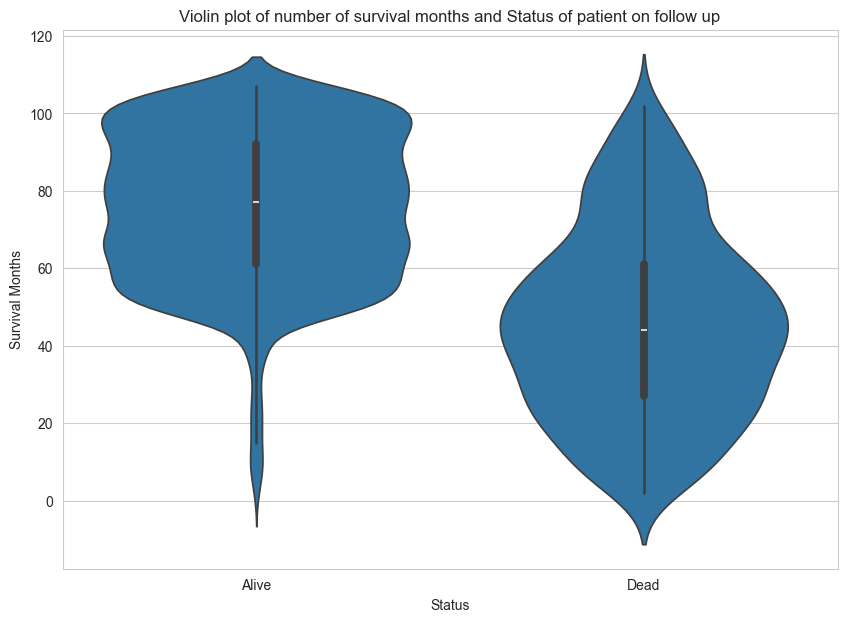

In [59]:
# Visualization of comparison of survival months and status on follow up
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Survival Months')
plt.title('Violin plot of number of survival months and Status of patient on follow up')
plt.show()

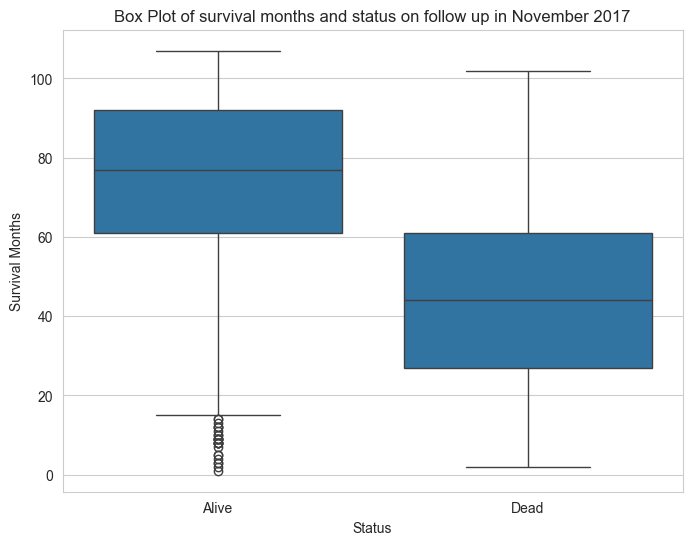

In [60]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Survival Months',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Survival Months')
ax.set_title('Box Plot of survival months and status on follow up in November 2017')
plt.show()

# E. Pair plot of numerical variables; tumor size, regional node examined, regional node positive and survival months

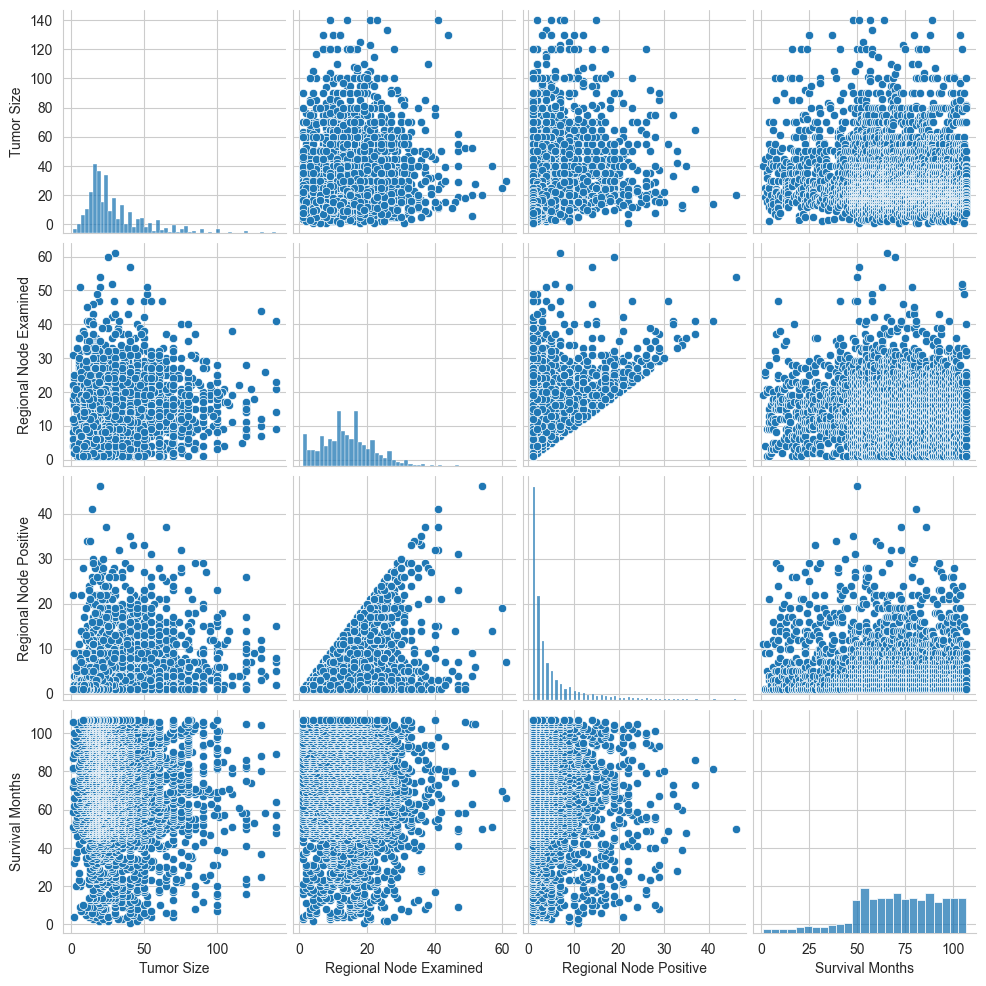

In [62]:
# visualization of the distribution and comparisons between the numerical variables
sns.pairplot(breast_cancer_numerical_data_2)